In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from scipy.fft import fft

In [226]:
df = pd.read_csv("df_no_null_date_formatted.csv")
df_sensor = df[['B_2', 'B_3', 'B_10', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19',  'B_21', 'B_24', 'B_25']]


df_sensor.head(3)

,B_2,B_3,B_10,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25
0,-0.0007,-0.0004,21.61,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190
1,-0.0043,0.0003,21.61,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442
2,0.0007,0.0000,21.61,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739


In [237]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report

df2 = df1[['B_2', 'B_3', 'B_10', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19',  'B_21', 'B_24', 'B_25']]

# Assuming 'Good' or 'Bad' labels exist in the 'output' column (replace 'output' with your actual column name)
X = df_sensor# Features
y = df['Good/Bad']  # Target variable

# Splitting the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=52, random_state=52,min_samples_split=48)  # Adjust parameters as needed

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)


# accuracy = accuracy_score(y_test, predictions)
print(accuracy)


# Generate and print the classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)


0.9543467702768335
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1734
           1       0.87      0.85      0.86       325

    accuracy                           0.96      2059
   macro avg       0.92      0.91      0.92      2059
weighted avg       0.96      0.96      0.96      2059



In [247]:
recall_score(y_test, predictions)

0.8492307692307692

In [236]:
for i in range(150,40,-1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

    rf_classifier = RandomForestClassifier(n_estimators=52, random_state=i, min_samples_split=i)  # Adjust parameters as needed
    # Train the model
    rf_classifier.fit(X_train, y_train)
    # Make predictions
    predictions = rf_classifier.predict(X_test)
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    f1 = f1_score(y_test, predictions)
    print(f1,i)
    

0.8407643312101911 150
0.8338557993730408 149
0.8575949367088607 148
0.8472440944881889 147
0.8571428571428571 146
0.8471337579617835 145
0.8507936507936508 144
0.8476190476190476 143
0.8489666136724959 142
0.8507936507936508 141
0.8449367088607597 140
0.853125 139
0.8503184713375798 138
0.8499210110584519 137
0.849445324881141 136
0.8522012578616351 135
0.8535433070866142 134
0.8544303797468353 133
0.8495297805642634 132
0.8471337579617835 131
0.8540031397174254 130
0.8535433070866142 129
0.8498402555910544 128
0.8485804416403786 127
0.8449367088607597 126
0.8467614533965244 125
0.8449367088607597 124
0.8444444444444446 123
0.8508634222919936 122
0.8544303797468353 121
0.8512658227848101 120
0.8526148969889065 119
0.8386075949367088 118
0.8481012658227848 117
0.8484848484848485 116
0.8489666136724959 115
0.85625 114
0.8593996840442338 113
0.8607198748043818 112
0.8432601880877743 111
0.8607198748043818 110
0.8562401263823065 109
0.8503937007874016 108
0.8499210110584519 107
0.85039370

In [243]:
test = pd.read_csv("test_data_cleaned_new2.csv")
test1 = test[['B_2', 'B_3', 'B_10', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19',  'B_21', 'B_24', 'B_25']]


In [244]:
X = test1  # Replace 'target_column' with your actual target column name

# Make predictions on the test data
test['Good/Bad'] = rf_classifier.predict(X)
test.rename(columns={"timestamp": "ID"}, inplace=True)
test["Cycle ID"] = test["Cycle ID"].astype('str').str.split(".").str[0]


test["ID"] = test["ID"].astype('str')
test["ID"] = test["ID"]+"-" +test["Cycle ID"]

test[['ID','Good/Bad']].to_csv("submission_ssn_620.csv",index=False)

In [241]:
test

,Unnamed: 0,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,ID,Good/Bad
0,0,82.0,127,-0.0014,-0.0003,100.0,518.67,14.62,21.61,1.3,...,8158.04,8.43140,0.03,393.0,2388.0,100.0,39.07,23.2800,4/27/2020 7:20-127-127,0
1,1,82.0,128,-0.0003,0.0003,100.0,518.67,14.62,21.61,1.3,...,8154.69,8.38970,0.03,391.0,2388.0,100.0,38.80,23.3672,4/27/2020 7:25-128-128,0
2,2,82.0,129,-0.0020,0.0000,100.0,518.67,14.62,21.61,1.3,...,8152.23,8.42980,0.03,392.0,2388.0,100.0,38.87,23.3531,4/27/2020 7:30-129-129,0
3,3,82.0,130,0.0000,-0.0002,100.0,518.67,14.62,21.61,1.3,...,8158.26,8.40780,0.03,391.0,2388.0,100.0,39.02,23.2821,4/27/2020 7:35-130-130,0
4,4,82.0,Bad,-0.0011,0.0003,100.0,518.67,14.62,21.61,1.3,...,8154.09,8.44900,0.03,391.0,2388.0,100.0,38.89,23.2888,4/27/2020 7:40-Bad-Bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,4122,100.0,196,-0.0004,-0.0003,100.0,518.67,14.62,21.61,1.3,...,8137.60,8.49560,0.03,397.0,2388.0,100.0,38.49,22.9735,5/11/2020 14:50-196-196,1
4123,4123,100.0,197,-0.0016,-0.0005,100.0,518.67,14.62,21.61,1.3,...,8136.50,8.51390,0.03,395.0,2388.0,100.0,38.30,23.1594,5/11/2020 14:55-197-197,1
4124,4124,100.0,198,0.0004,0.0000,100.0,518.67,14.62,21.61,1.3,...,8141.05,8.56460,0.03,398.0,2388.0,100.0,38.44,22.9333,5/11/2020 15:00-198-198,1
4125,4125,100.0,199,-0.0011,0.0003,100.0,518.67,14.62,21.61,1.3,...,8139.29,8.53890,0.03,395.0,2388.0,100.0,38.29,23.0640,5/11/2020 15:05-199-199,1


In [242]:
test[['ID','Good/Bad']].iloc[200:700]

,ID,Good/Bad
200,4/28/2020 0:00-113-113,0
201,4/28/2020 0:05-114-114,0
202,4/28/2020 0:10-115-115,0
203,4/28/2020 0:15-116-116,0
204,4/28/2020 0:20-117-117,0
...,...,...
695,4/29/2020 17:16-48-48,0
696,4/29/2020 17:20-49-49,0
697,4/29/2020 17:25-50-50,0
698,4/29/2020 17:30-51-51,0


In [79]:
df1["ID"]

0       03/03/2020 06:50
1         3/21/2020 2:45
2         4/13/2020 8:05
3        4/18/2020 14:05
4       04/01/2020 10:15
              ...       
5053    04/02/2020 01:55
5054     4/16/2020 21:35
5055     3/30/2020 18:10
5056     4/14/2020 21:25
5057      3/26/2020 1:30
Name: ID, Length: 5058, dtype: object

In [ ]:
df1[['ID',"Good/Bad"]].to_csv('')

In [47]:
max_cycle_id = df["Cycle ID"].max()

# Perform cyclical encoding
df["Cycle ID Sin"] = np.sin(2 * np.pi * df["Cycle ID"] / max_cycle_id)
df["Cycle ID Cos"] = np.cos(2 * np.pi * df["Cycle ID"] / max_cycle_id)

df[["Period Code","Cycle ID","Cycle ID Sin","Cycle ID Cos"]]

,Period Code,Cycle ID,Cycle ID Sin,Cycle ID Cos
0,1,1,0.017356,0.999849
1,1,2,0.034707,0.999398
2,1,3,0.052047,0.998645
3,1,4,0.069372,0.997591
4,1,5,0.086675,0.996237
...,...,...,...,...
15836,82,122,0.854223,-0.519906
15837,82,123,0.845071,-0.534654
15838,82,124,0.835664,-0.549240
15839,82,125,0.826006,-0.563661


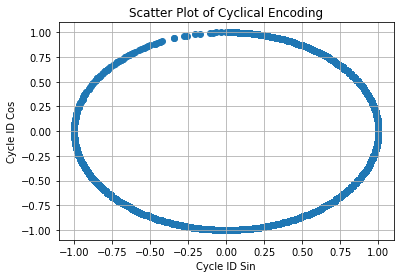

In [8]:
# Create a scatter plot to visualize the correlation
plt.scatter(df["Cycle ID Sin"], df["Cycle ID Cos"])
plt.title("Scatter Plot of Cyclical Encoding")
plt.xlabel("Cycle ID Sin")
plt.ylabel("Cycle ID Cos")
plt.grid(True)

# Show the plot
plt.show()

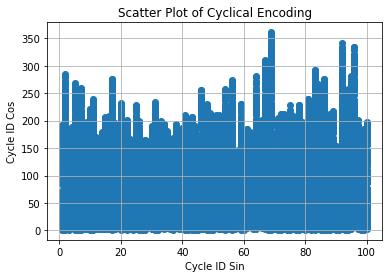

In [9]:
plt.scatter(df["Period Code"], df["Cycle ID"])
plt.title("Scatter Plot of Cyclical Encoding")
plt.xlabel("Cycle ID Sin")
plt.ylabel("Cycle ID Cos")
plt.grid(True)

# Show the plot
plt.show()

In [14]:
df_sensor = df[['Period Code','Cycle ID','B_2', 'B_3', 'B_10', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19',  'B_21', 'B_24', 'B_25','Good/Bad','timestamp']]

4,5,9,14,20,22,23

In [17]:
# Step 1: PCA Dimension Reduction
# Choose the number of components to retain (e.g., n_components=5)
n_components = 5
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(df_sensor)

# Create a DataFrame with the reduced data and PCA component names
pca_columns = [f'PC_{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=reduced_data, columns=pca_columns)
    

In [18]:
pca_df

,PC_1,PC_2,PC_3,PC_4,PC_5
0,-5.163718,-1.140728,0.176088,0.075897,0.168575
1,-10.595119,-3.158627,0.244142,-0.156446,-0.022386
2,-9.957521,-1.502498,-0.943240,-0.129757,-0.156129
3,-9.964981,-0.325984,-0.716686,0.016434,-0.067487
4,-10.952889,-1.983156,0.474353,0.217938,-0.061801
...,...,...,...,...,...
10287,-3.895019,4.330826,0.337690,0.249292,0.075412
10288,-0.219152,3.895103,-0.558025,-0.269944,0.106662
10289,-1.656845,4.106800,-0.122725,-0.185559,0.031974
10290,-6.073990,4.404702,0.384095,0.091618,-0.018481


In [26]:
df['Hour'] = df['time'].dt.hour


In [25]:
df["time"] = pd.to_datetime(df["time"])


In [29]:
fft(df_sensor['B_2'])

AttributeError: 'Series' object has no attribute 'flags'

In [30]:
fft_values = {col: fft(np.array(df_sensor[col])) for col in df_sensor.columns}

# Add columns for frequency and amplitude to the DataFrame
for col in df_sensor.columns:
    fft_result = fft_values[col]
    num_samples = len(fft_result)
    frequency = np.fft.fftfreq(num_samples, 1)
    amplitude = np.abs(fft_result)
    df[f'{col}_Frequency'] = frequency
    df[f'{col}_Amplitude'] = amplitude
    


In [31]:
df

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_21_Frequency,B_21_Amplitude,B_22_Frequency,B_22_Amplitude,B_23_Frequency,B_23_Amplitude,B_24_Frequency,B_24_Amplitude,B_25_Frequency,B_25_Amplitude
0,1.0,1.0,-0.0007,-0.0004,100.0,518.67,14.62,21.61,1.3,47.47,...,0.000000,4.046983e+06,0.000000,2.457730e+07,0.000000,1.029200e+06,0.000000,399512.150000,0.000000,239700.766300
1,1.0,3.0,-0.0043,0.0003,100.0,518.67,14.62,21.61,1.3,47.27,...,0.000097,1.392959e+02,0.000097,1.127504e-10,0.000097,3.875796e-11,0.000097,37.751909,0.000097,20.369417
2,1.0,4.0,0.0007,0.0000,100.0,518.67,14.62,21.61,1.3,47.13,...,0.000194,8.881227e+02,0.000194,5.633483e-10,0.000194,7.041854e-12,0.000194,110.304487,0.000194,69.055376
3,1.0,5.0,-0.0019,-0.0002,100.0,518.67,14.62,21.61,1.3,47.28,...,0.000291,4.145525e+02,0.000291,2.250703e-10,0.000291,0.000000e+00,0.000291,49.286369,0.000291,27.669654
4,1.0,6.0,-0.0043,-0.0001,100.0,518.67,14.62,21.61,1.3,47.16,...,0.000389,4.606084e+02,0.000389,5.617350e-10,0.000389,0.000000e+00,0.000389,59.520005,0.000389,40.144988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,100.0,189.0,0.0015,0.0001,100.0,518.67,14.62,21.61,1.3,47.99,...,-0.000486,1.926100e+02,-0.000486,0.000000e+00,-0.000486,1.751646e-11,-0.000486,11.900149,-0.000486,12.384207
10288,100.0,192.0,-0.0009,0.0001,100.0,518.67,14.62,21.61,1.3,48.18,...,-0.000389,4.606084e+02,-0.000389,5.617350e-10,-0.000389,0.000000e+00,-0.000389,59.520005,-0.000389,40.144988
10289,100.0,193.0,-0.0001,0.0002,100.0,518.67,14.62,21.61,1.3,48.19,...,-0.000291,4.145525e+02,-0.000291,2.250703e-10,-0.000291,0.000000e+00,-0.000291,49.286369,-0.000291,27.669654
10290,100.0,196.0,-0.0004,-0.0003,100.0,518.67,14.62,21.61,1.3,48.07,...,-0.000194,8.881227e+02,-0.000194,5.633483e-10,-0.000194,7.041854e-12,-0.000194,110.304487,-0.000194,69.055376


In [33]:
df2 = pd.read_csv("my_data1.csv")